In [46]:
#Import neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [47]:
#Import CSV file as dataframe and do a quick glance at its properties
df = pd.read_csv(r"C:\Users\yousi\Documents\GitHub\Portfolio\Data Science\Regular Projects\Machine Learning Fundamentals\Tennis Ace\TennisStats.csv")

print(df.head())
print("------------------------------------------")
print(df.columns)
print("------------------------------------------")
print(df.dtypes)
print("------------------------------------------")

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [48]:
#Here I look at the amount of service games played, and found out that I will get NaN values if i try to calculate a winrate with the service games played column if a data point has a 0 value
#Luckily theres only one data point with 0 service games played so I just remove it. 
print(np.min(df["ServiceGamesPlayed"]))
print("------------------------------------------")
print("Num people who haven't played any service games: ", (df["ServiceGamesPlayed"] == 0).sum()) #Should return 1, so only 1 present with 0 service games
print("------------------------------------------")
df = df[df['ServiceGamesPlayed'] != 0]

#Now I calculate the service game winrate
df['servicewinrate'] = (df['ServiceGamesWon'] / (df['ServiceGamesPlayed'])) * 100

print(df["servicewinrate"])


0
------------------------------------------
Num people who haven't played any service games:  1
------------------------------------------
0        6.250000
1        7.444444
2        3.823529
3        5.333333
4       25.000000
          ...    
1716     5.583333
1717     4.000000
1718     4.071429
1719     2.833333
1720     3.125000
Name: servicewinrate, Length: 1720, dtype: float64


In [49]:
df['winrate'] = (df['Wins'] / (df['Wins'] + df['Losses'])) * 100
print(df["winrate"])
print("------------------------------------------")
nan_count = df["winrate"].isna().sum()
print("Num people who haven't played any games: ", nan_count)
print("------------------------------------------")

0       33.333333
1        0.000000
2       80.000000
3             NaN
4        0.000000
          ...    
1716     0.000000
1717    44.444444
1718     0.000000
1719     0.000000
1720     0.000000
Name: winrate, Length: 1720, dtype: float64
------------------------------------------
Num people who haven't played any games:  54
------------------------------------------


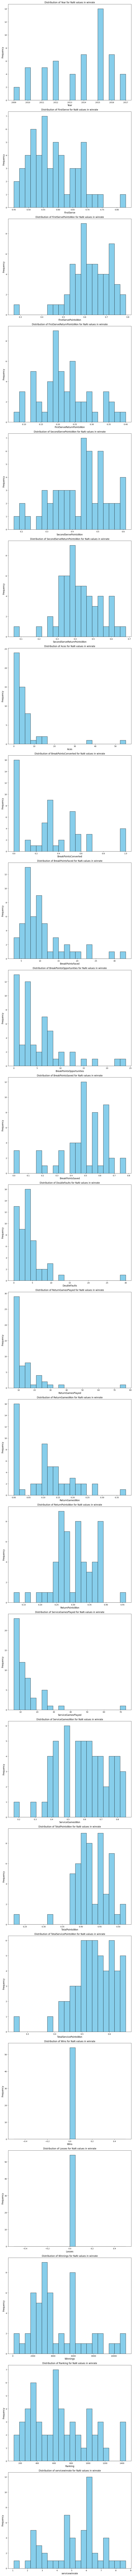

0       33.333333
1        0.000000
2       80.000000
3             NaN
4        0.000000
          ...    
1716     0.000000
1717    44.444444
1718     0.000000
1719     0.000000
1720     0.000000
Name: winrate, Length: 1720, dtype: float64


In [50]:
#So we have players with NaN winrates, meaning there are some that don't have any wins or losses recorded, so we get NaNs when trying to divide by 0. 
#There are 54 of these datapoints, so it is a good idea to look at the distributions for their other features to see if the NaN winrate datapoints represent any kind of subgroups or clusters that
#aren't obvious. Plotting the distributions for these features will help us see this. 

target_column = 'winrate'
# Plot a count plot of NaN values in the target column

# Select rows with NaN values in the target column
nan_rows = df[df[target_column].isna()]
#Drop the winrate column from each of these data points. 
nan_rows = nan_rows.drop(columns=[target_column,'Player'])

# Get the number of features
num_features = len(nan_rows.columns)

# Create subplots for each feature
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 8*num_features))

# Plot the distribution of each feature for rows where the target column is NaN
for i, column in enumerate(nan_rows.columns):
    ax = axes[i]
    ax.hist(nan_rows[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column} for NaN values in {target_column}', fontsize=12)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

#From looking at this graph i can see that there isn't anything particular about the 54 players who have NaN winrates (meaning they haven't registered any wins or losses), so I'll drop them.
print(df["winrate"])


In [54]:
#From a look at these graphs it doesn't seem like theres any particular reason that these NaN values in the winrate are NaN values, in other words, they have 0 wins/losses recorded by random.
#Therefore it is safe to drop these 54 NaN values in the winrates. 
df = df.dropna(subset=["winrate"])
#Now we test for NaN values in other columns: 
for column in df.columns: 
    print(f"Do we have any NaN values in our {column} column? {df[column].isna().any()}")

#Fantastic, we don't appear to have any NaN values in our columns. 

Do we have any NaN values in our Player column? False
Do we have any NaN values in our Year column? False
Do we have any NaN values in our FirstServe column? False
Do we have any NaN values in our FirstServePointsWon column? False
Do we have any NaN values in our FirstServeReturnPointsWon column? False
Do we have any NaN values in our SecondServePointsWon column? False
Do we have any NaN values in our SecondServeReturnPointsWon column? False
Do we have any NaN values in our Aces column? False
Do we have any NaN values in our BreakPointsConverted column? False
Do we have any NaN values in our BreakPointsFaced column? False
Do we have any NaN values in our BreakPointsOpportunities column? False
Do we have any NaN values in our BreakPointsSaved column? False
Do we have any NaN values in our DoubleFaults column? False
Do we have any NaN values in our ReturnGamesPlayed column? False
Do we have any NaN values in our ReturnGamesWon column? False
Do we have any NaN values in our ReturnPointsWo

In [ ]:
#From here on out it would be interesting to look at the scatterplots between the winrates, and the other columns, to see which ones let you win the most tennis matches. 